In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [20]:
# Dataset overview
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Info summary
df.info()

# Check missing values
df.isnull().sum()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


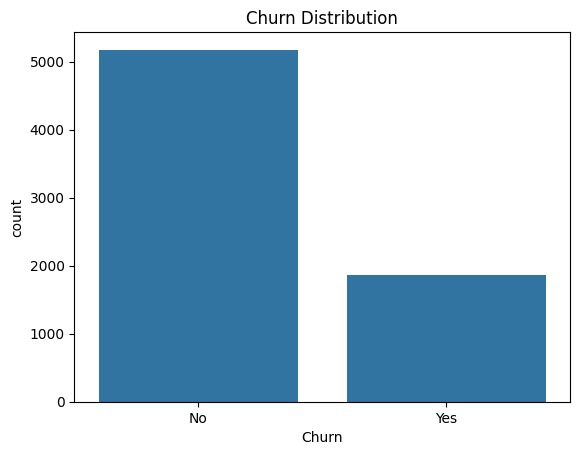

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [22]:
# Target variable countplot
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Percentage
df["Churn"].value_counts(normalize=True) * 100

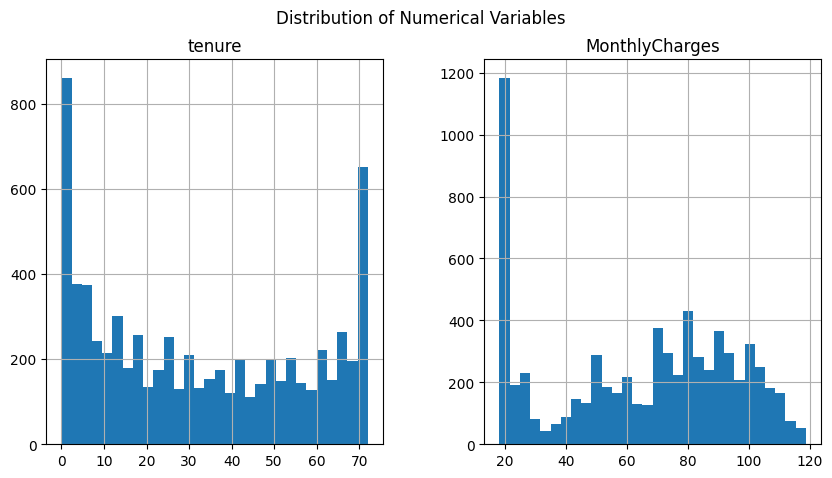

In [23]:
# Distribution of numerical variables

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_cols].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

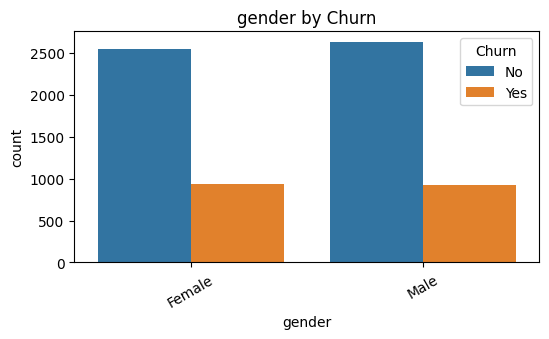

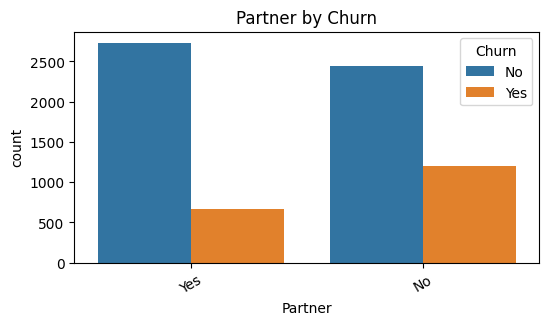

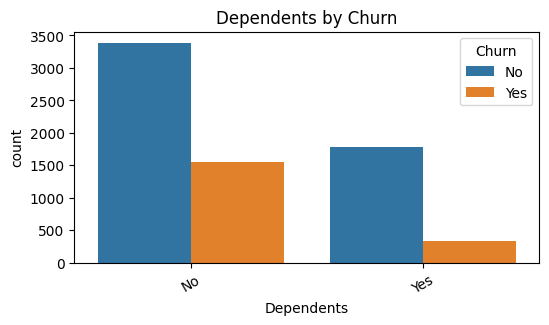

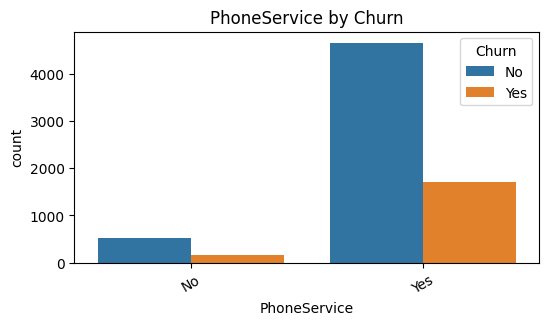

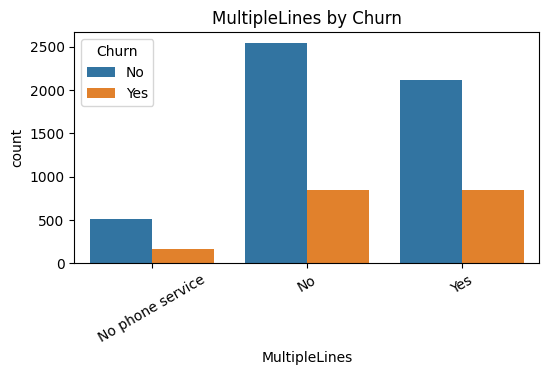

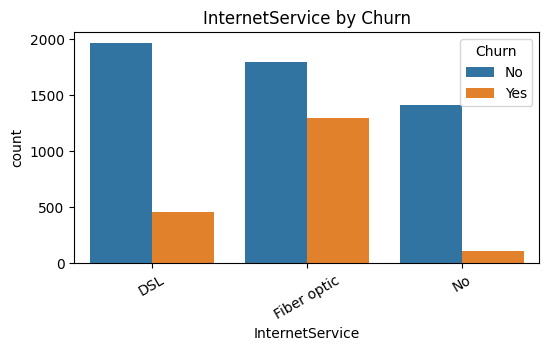

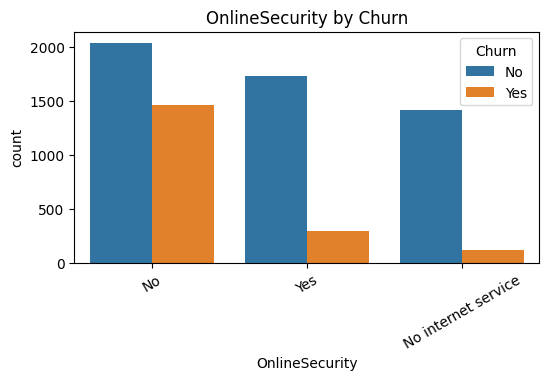

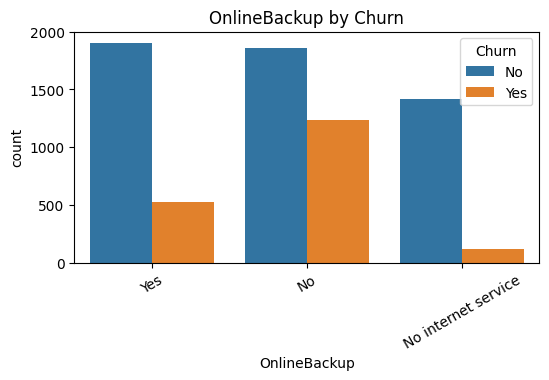

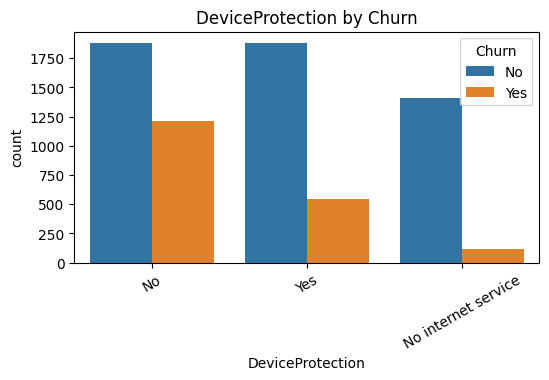

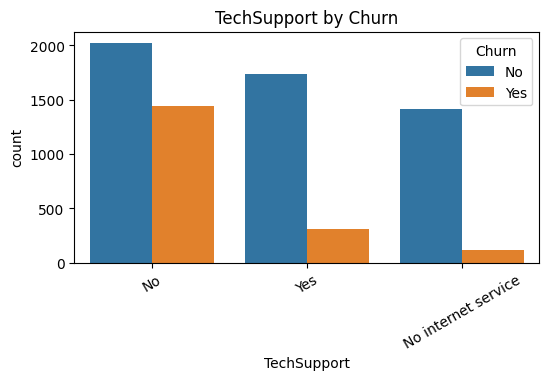

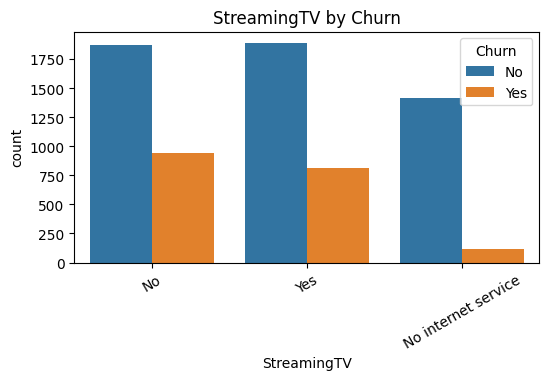

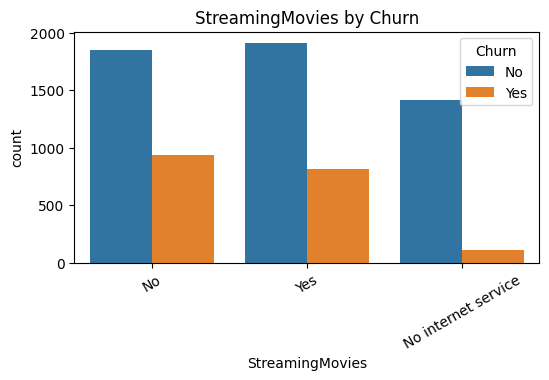

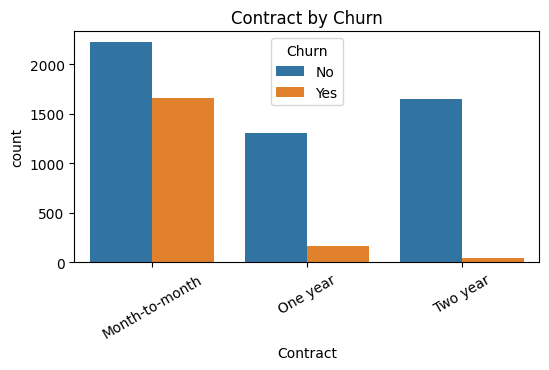

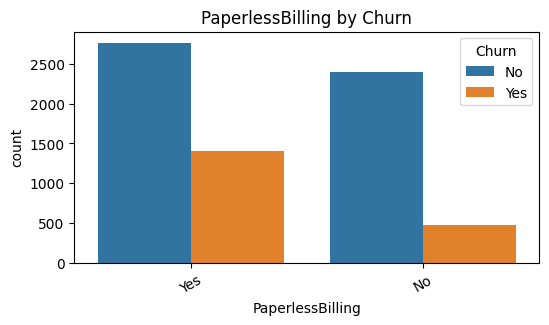

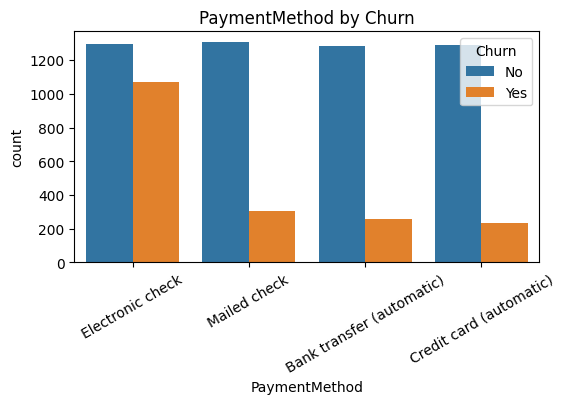

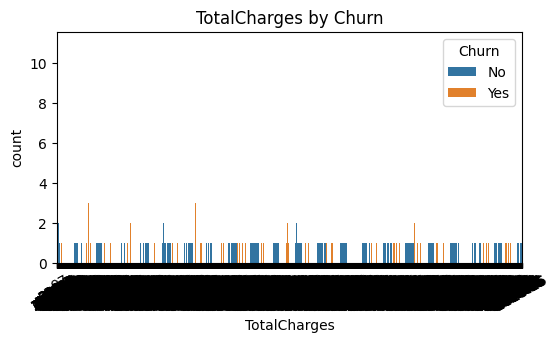

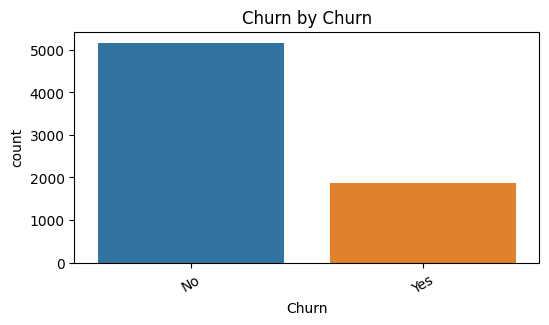

In [24]:
# Distribution of categorical variables

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.remove("customerID")  # ID not useful

# Barplots for categorical variables vs churn
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=30)
    plt.show()

In [33]:
# Handle Missing Values

# Convert TotalCharges to numeric (has blanks as spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values
print(df.isnull().sum())

# Impute with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
                                        ..
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Length: 7073, dtype: int64


In [ ]:
# Encoding Categorical Variables

# Binary encoding for target
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

# One-hot encode categorical predictors
df = pd.get_dummies(df, drop_first=True)

# Scaling Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [29]:
# Train-test split

X = df.drop(["Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (4930, 7072) Testing set: (2113, 7072)
